In [54]:
import pandas as pd
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('crimes_against_women_2001-2014.csv')

In [27]:
df

,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10181,829,DEHLI UT,VIGILANCE,2014,0,0,0,0,0,0,0
10182,830,DEHLI UT,WEST,2014,251,546,13,484,63,416,0
10183,832,LAKSHADWEEP,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10184,834,PUDUCHERRY,KARAIKAL,2014,3,1,0,12,1,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   sr_no                            10186 non-null  int64 
 1   state_ut                         10186 non-null  object
 2   district                         10186 non-null  object
 3   year                             10186 non-null  int64 
 4   rape                             10186 non-null  int64 
 5   kidnapping_and_abduction         10186 non-null  int64 
 6   dowry_deaths                     10186 non-null  int64 
 7   assault_on_women                 10186 non-null  int64 
 8   insult_to_modesty                10186 non-null  int64 
 9   cruelty_by_husband_or_relatives  10186 non-null  int64 
 10  importation_of_girls             10186 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 875.5+ KB


In [29]:
df_final = df.sort_values(["year"])

In [30]:
df_kar = df[df["state_ut"]=="KARNATAKA"]

In [31]:
df_bangalore = df_kar[df_kar["district"]=="BANGALORE COMMR."]

In [32]:
df_bangalore

,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
244,255,KARNATAKA,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
926,972,KARNATAKA,BANGALORE COMMR.,2002,32,58,33,237,62,242,0
1614,1695,KARNATAKA,BANGALORE COMMR.,2003,34,11,34,213,39,213,0
2307,2423,KARNATAKA,BANGALORE COMMR.,2004,32,61,44,151,35,227,0
3006,3157,KARNATAKA,BANGALORE COMMR.,2005,38,25,39,167,39,287,0
3705,3891,KARNATAKA,BANGALORE COMMR.,2006,33,29,50,143,2,290,0
4412,4633,KARNATAKA,BANGALORE COMMR.,2007,62,35,54,187,2,290,0
5124,5380,KARNATAKA,BANGALORE COMMR.,2008,54,2,52,179,1,307,0
5854,6145,KARNATAKA,BANGALORE COMMR.,2009,65,2,50,251,35,367,0
6593,6919,KARNATAKA,BANGALORE COMMR.,2010,65,29,52,308,50,398,0


In [33]:
import numpy as np
df_bangalore["t"] = np.arange(1,14)

df_bangalore["t_square"] = df_bangalore["t"] * df_bangalore["t"]
df_bangalore["log_rape"] = np.log(df_bangalore["rape"])
df_bangalore.columns


<ipython-input-33-e5de1c3c6535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bangalore["t"] = np.arange(1,14)
<ipython-input-33-e5de1c3c6535>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bangalore["t_square"] = df_bangalore["t"] * df_bangalore["t"]
<ipython-input-33-e5de1c3c6535>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Index(['sr_no', 'state_ut', 'district', 'year', 'rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls', 't', 't_square', 'log_rape'],
      dtype='object')

In [34]:
# Data Partition
Train = df_bangalore.head(10)
Test = df_bangalore.tail(3)

In [133]:
Train

,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls,t,t_square,log_rape
244,255,KARNATAKA,BANGALORE COMMR.,2001,40,56,40,223,51,229,0,1,1,3.688879
926,972,KARNATAKA,BANGALORE COMMR.,2002,32,58,33,237,62,242,0,2,4,3.465736
1614,1695,KARNATAKA,BANGALORE COMMR.,2003,34,11,34,213,39,213,0,3,9,3.526361
2307,2423,KARNATAKA,BANGALORE COMMR.,2004,32,61,44,151,35,227,0,4,16,3.465736
3006,3157,KARNATAKA,BANGALORE COMMR.,2005,38,25,39,167,39,287,0,5,25,3.637586
3705,3891,KARNATAKA,BANGALORE COMMR.,2006,33,29,50,143,2,290,0,6,36,3.496508
4412,4633,KARNATAKA,BANGALORE COMMR.,2007,62,35,54,187,2,290,0,7,49,4.127134
5124,5380,KARNATAKA,BANGALORE COMMR.,2008,54,2,52,179,1,307,0,8,64,3.988984
5854,6145,KARNATAKA,BANGALORE COMMR.,2009,65,2,50,251,35,367,0,9,81,4.174387
6593,6919,KARNATAKA,BANGALORE COMMR.,2010,65,29,52,308,50,398,0,10,100,4.174387


Linear

In [18]:

linear_model = smf.ols('rape ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['rape']) - np.array(pred_linear))**2))
rmse_linear


20.874949435319593

In [44]:
pred_linear

7340    66.866667
8106    70.751515
8885    74.636364
dtype: float64

Exponential

In [19]:
Exp = smf.ols('log_rape ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['rape']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

18.928533729978376

Quadratic

In [130]:
Quad = smf.ols(str('rape')+ '~ t+ t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['rape']) - np.array(pred_Quad))**2))
rmse_Quad

17.459506695306924

In [21]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,20.874949
1,rmse_Exp,18.928534
2,rmse_Quad,17.459507


In [47]:
# i'll be using sklearns polynomial features 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mod = LinearRegression()


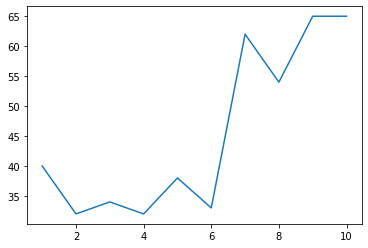

In [55]:
plt.plot(Train[['t']], Train[['rape']])

In [122]:
# creating the polynomial model i'll try a degree 2-4 model

def polynomial_reg(degree, x_train, y_train, x_test, y_test, return_metrics = False):
    
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(x_train)
    x_test = poly_feat.fit_transform(x_test)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
    model = LinearRegression()
    poly_model = model.fit(X_poly, y_train)
    pred = poly_model.predict(x_test)
    if return_metrics == True:
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        print('Rmse: {}, Mae: {}, r2score: {}'.format(rmse, mae, r2),'\n', pred)
    else:
        return pred


In [123]:
x_train, y_train, x_test, y_test = Train[['t']], Train[['rape']], Test[['t']], Test['rape']

In [180]:
polynomial_reg(1, x_train, y_train, np.array([[16]]), y_test, return_metrics= False)

array([[86.29090909]])

In [127]:
for a in range(1, 10):
    print('degree {}'.format(a))
    polynomial_reg(a, x_train, y_train, x_test, y_test, return_metrics= True)

degree 1
Rmse: 20.874949435319607, Mae: 18.248484848484853, r2score: -7.954044806722269 
 [[66.86666667]
 [70.75151515]
 [74.63636364]]
degree 2
Rmse: 17.45950669530686, Mae: 14.719191919191928, r2score: -5.263720014591749 
 [[ 81.03333333]
 [ 92.64545455]
 [105.54545455]]
degree 3
Rmse: 32.64155441121477, Mae: 32.62626262626461, r2score: -20.893241254389615 
 [[64.66666667]
 [58.42424242]
 [46.03030303]]
degree 4
Rmse: 65.03641700764615, Mae: 62.080808080825335, r2score: -85.91237405189955 
 [[55.66666667]
 [33.06060606]
 [-7.96969697]]
degree 5
Rmse: 56.83485245077442, Mae: 55.05858585923456, r2score: -65.3739819130404 
 [[57.13333333]
 [38.52727273]
 [ 6.16363636]]
degree 6
Rmse: 439.42412681839113, Mae: 317.81818139345955, r2score: -3966.6759567829895 
 [[110.86666663]
 [297.42424214]
 [812.16363541]]
degree 7
Rmse: 883.8482452197486, Mae: 649.9697564211023, r2score: -16050.802477630728 
 [[   13.19999419]
 [ -297.4545817 ]
 [-1398.65468176]]
degree 8
Rmse: 15986.086800007719, Mae:

In [188]:
# i want a function that sums all states and just leaves year
unique_states = df['state_ut'].unique()
def state_reg(df, state, crime, year):
    state_df = df[df['state_ut']== state]
    state_df = state_df.groupby('year', as_index= False)['rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls'].sum()
    state_df.fillna(0, inplace= True)
    
    state_df["t"] = np.arange(1,len(state_df)+1)

    state_df["t_square"] = state_df["t"] * state_df["t"]
    state_df['log_crime'] = np.log(state_df[crime])
    x_train = state_df[['t', 't_square']]
    y_train = state_df[crime]
    if year <= 2014:
        yeartopred = state_df[['t', 't_square']][state_df['year'] == year]
    elif year== 2015:
        yeartopred1 = 15
        yeartopred2 = 15**2
        yeartopred= np.array([[yeartopred1, yeartopred2]])
    elif year == 2016:
        yeartopred3 = 16
        yeartopred4 = 16**2
        yeartopred= np.array([[yeartopred3, yeartopred4]])
        
    
    #Quad = smf.ols(str(crime) + '~ t+ t_square', data = state_df).fit()
    pred_Quad = polynomial_reg(2, x_train, y_train, yeartopred, y_test, return_metrics= False)
    return pred_Quad

In [190]:
state_reg(df, 'KARNATAKA', 'rape', 2016)

<ipython-input-188-3f2f70702179>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_df = state_df.groupby('year', as_index= False)['rape',


array([2615.97952048])

In [150]:
df[df.state_ut =='KARNATAKA'].groupby('year')['rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls'].sum()

<ipython-input-150-f144869b77d5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df.state_ut =='KARNATAKA'].groupby('year')['rape',


,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
year,,,,,,,
2001,293,271,220,1665,81,1755,0
2002,292,300,233,1648,100,1826,0
2003,321,244,194,1585,84,1704,0
2004,291,286,259,1435,57,1588,0
2005,343,312,261,1585,71,1883,0
2006,400,328,244,1683,38,2129,0
2007,436,390,251,1828,28,2507,0
2008,446,405,259,1954,44,2638,1
2009,509,408,264,2186,64,3185,2
